In [76]:
import pandas as pd
import numpy as np

df = pd.read_excel(r'dset2.xlsx')
df.head()

,Actual motive,Pursue your goal
0,Self sufficient,No
1,earn money,yes
2,Earn money,yes
3,dont know,yes
4,Want to do Masters for good job.,Yes


In [77]:
df.columns

Index(['Actual motive', 'Pursue your goal'], dtype='object')

In [78]:
df = df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [79]:
 df = df.dropna()

In [80]:
label = {'yes': 1, 'no': 0,'maybe': 2}
df['Pursue your goal'] = df['Pursue your goal'].map(label)
df.head()

,Actual motive,Pursue your goal
0,self sufficient,0
1,earn money,1
2,earn money,1
3,dont know,1
4,want to do masters for good job.,1


In [81]:
df.columns = ['motive', 'goal']
df.head()

,motive,goal
0,self sufficient,0
1,earn money,1
2,earn money,1
3,dont know,1
4,want to do masters for good job.,1


In [82]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

motives = df.motive.str.cat(sep=' ')
tokens = word_tokenize(motives)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

149


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['to',
 'money',
 'my',
 'parents',
 'be',
 'and',
 'want',
 'independent',
 'self',
 'a',
 'become',
 'life',
 'i',
 ',',
 'good',
 'happiness',
 'being',
 'earn',
 'for',
 '.',
 'family',
 'happy',
 'independence',
 'of',
 'as',
 'something',
 'sufficient',
 'do',
 'live',
 'make',
 'mother',
 'pursue',
 'teaching',
 'no',
 'see',
 'getting',
 'financial',
 'the',
 'honest',
 'respect',
 'successful',
 'making',
 'games',
 'others',
 'love',
 'so',
 'work',
 'knowledge',
 'dont',
 'know']

In [83]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

124


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['money',
 'parents',
 'want',
 'independent',
 'self',
 'become',
 'life',
 ',',
 'good',
 'happiness',
 'earn',
 '.',
 'family',
 'happy',
 'independence',
 'something',
 'sufficient',
 'live',
 'make',
 'mother',
 'pursue',
 'teaching',
 'see',
 'getting',
 'financial',
 'honest',
 'respect',
 'successful',
 'making',
 'games',
 'others',
 'love',
 'work',
 'knowledge',
 'dont',
 'know',
 'masters',
 'job',
 'decently',
 'religion',
 'proud',
 'yes',
 'safe',
 'data',
 'distribution',
 'dependency',
 'intersteller',
 'satisfied',
 'elon',
 'musk']

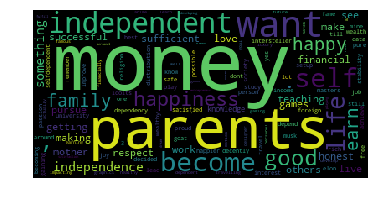

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [85]:
df

,motive,goal
0,self sufficient,0
1,earn money,1
2,earn money,1
3,dont know,1
4,want to do masters for good job.,1
5,live decently,1
6,religion,0
7,happiness,1
9,to make my family happy,1
10,make my mother proud,1


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['motive'], df['goal'], test_size=0.2)

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(76, 108) (19, 108)


In [87]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_vectors, y_train)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted))

0.631578947368421
[[ 0  6  0]
 [ 0 12  0]
 [ 0  1  0]]


In [88]:
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_vectors, y_train)
    y_pred = knn.predict(test_vectors)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
print(scores_list)
for i in range(0, 25):
    print('K: {} , Score: {}'.format(k_range[i], scores_list[i]))
'''

"\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn import metrics\n\nk_range = range(1, 26)\nscores = {}\nscores_list = []\nfor k in k_range:\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(train_vectors, y_train)\n    y_pred = knn.predict(test_vectors)\n    scores[k] = metrics.accuracy_score(y_test,y_pred)\n    scores_list.append(metrics.accuracy_score(y_test,y_pred))\nprint(scores_list)\nfor i in range(0, 25):\n    print('K: {} , Score: {}'.format(k_range[i], scores_list[i]))\n"

In [89]:
'''
from sklearn.svm import SVC

svc_classifier = SVC(kernel='poly', degree=8, gamma='auto')
svc_classifier.fit(train_vectors, y_train)
y_prediction = svc_classifier.predict(test_vectors)
print(accuracy_score(y_test, y_prediction))
print("ill-->")
print(set(y_test) - set(y_prediction))
print(confusion_matrix(y_test,y_prediction))
'''

'\nfrom sklearn.svm import SVC\n\nsvc_classifier = SVC(kernel=\'poly\', degree=8, gamma=\'auto\')\nsvc_classifier.fit(train_vectors, y_train)\ny_prediction = svc_classifier.predict(test_vectors)\nprint(accuracy_score(y_test, y_prediction))\nprint("ill-->")\nprint(set(y_test) - set(y_prediction))\nprint(confusion_matrix(y_test,y_prediction))\n'